In [1]:
from dask.distributed import Client

In [2]:
client = Client(processes=False, memory_limit='1.2GB')

In [3]:
client

Client Scheduler: inproc://10.32.14.5/560/1 Dashboard: /user/andersy005/proxy/8787/status,Cluster Workers: 1 Cores: 4 Memory: 1.20 GB


In [4]:
import dask

In [5]:
df = dask.datasets.timeseries(partition_freq='15D')

In [6]:
df.npartitions

2

In [7]:
df['z'] = df.x + df.y

In [8]:
df.head()

,id,name,x,y,z
timestamp,,,,,
2000-01-01 00:00:00,1013,Ray,0.304558,0.867495,1.172053
2000-01-01 00:00:01,1060,Hannah,-0.432159,0.224622,-0.207537
2000-01-01 00:00:02,1022,Xavier,0.515267,-0.907694,-0.392427
2000-01-01 00:00:03,1021,Norbert,-0.164694,0.697260,0.532566
2000-01-01 00:00:04,1074,Tim,0.126509,-0.778149,-0.651639


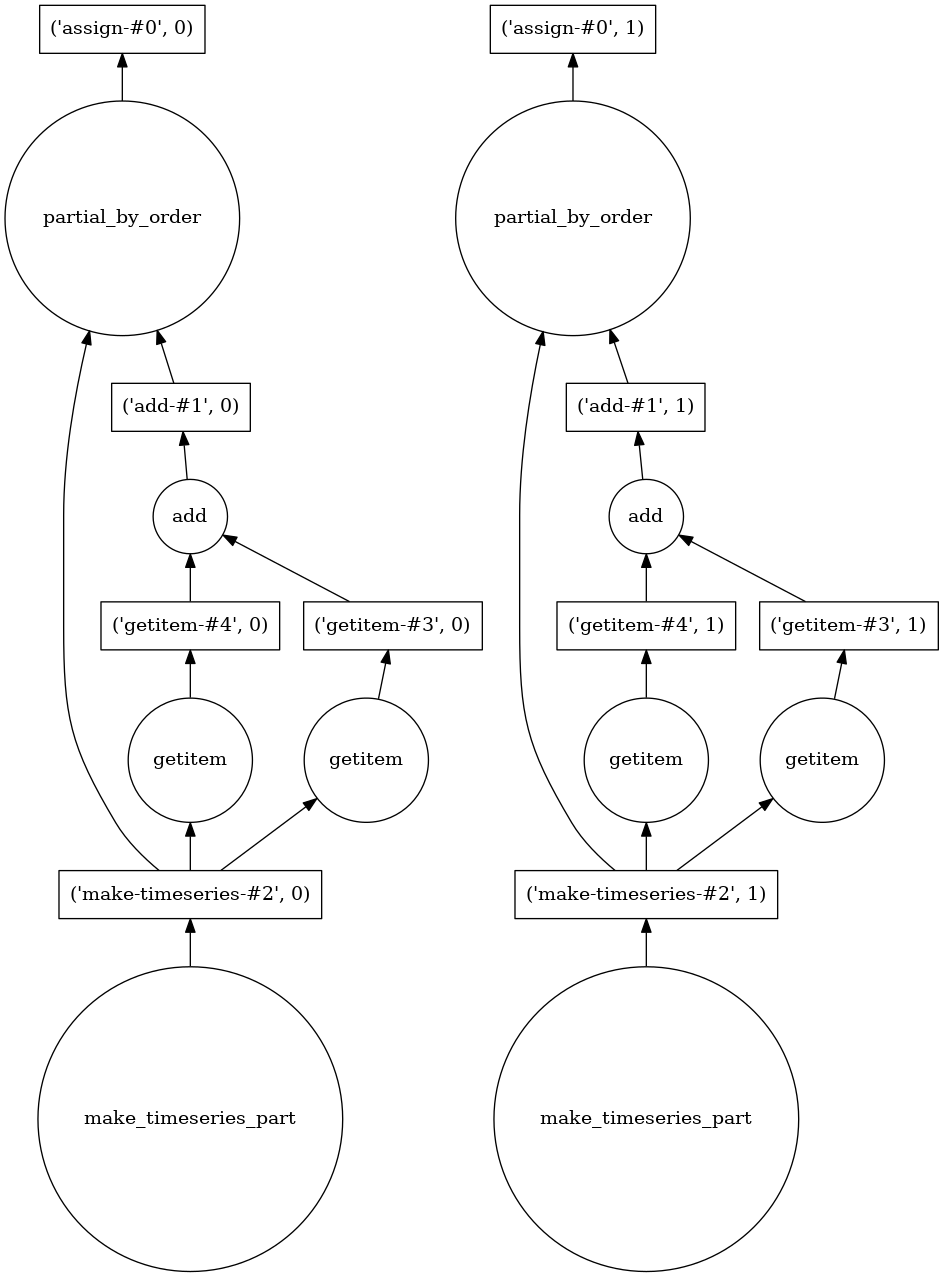

In [9]:
df.visualize('dask-pre-persist', format='png')

In [10]:
df = df.persist() 

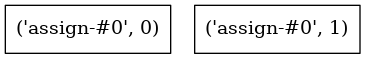

In [11]:
df.visualize('dask-post-persist', format='png')

In [12]:
df['tmp'] = df.x + df.y + df.z

In [13]:
df.head()

,id,name,x,y,z,tmp
timestamp,,,,,,
2000-01-01 00:00:00,1013,Ray,0.304558,0.867495,1.172053,2.344105
2000-01-01 00:00:01,1060,Hannah,-0.432159,0.224622,-0.207537,-0.415075
2000-01-01 00:00:02,1022,Xavier,0.515267,-0.907694,-0.392427,-0.784854
2000-01-01 00:00:03,1021,Norbert,-0.164694,0.697260,0.532566,1.065133
2000-01-01 00:00:04,1074,Tim,0.126509,-0.778149,-0.651639,-1.303278


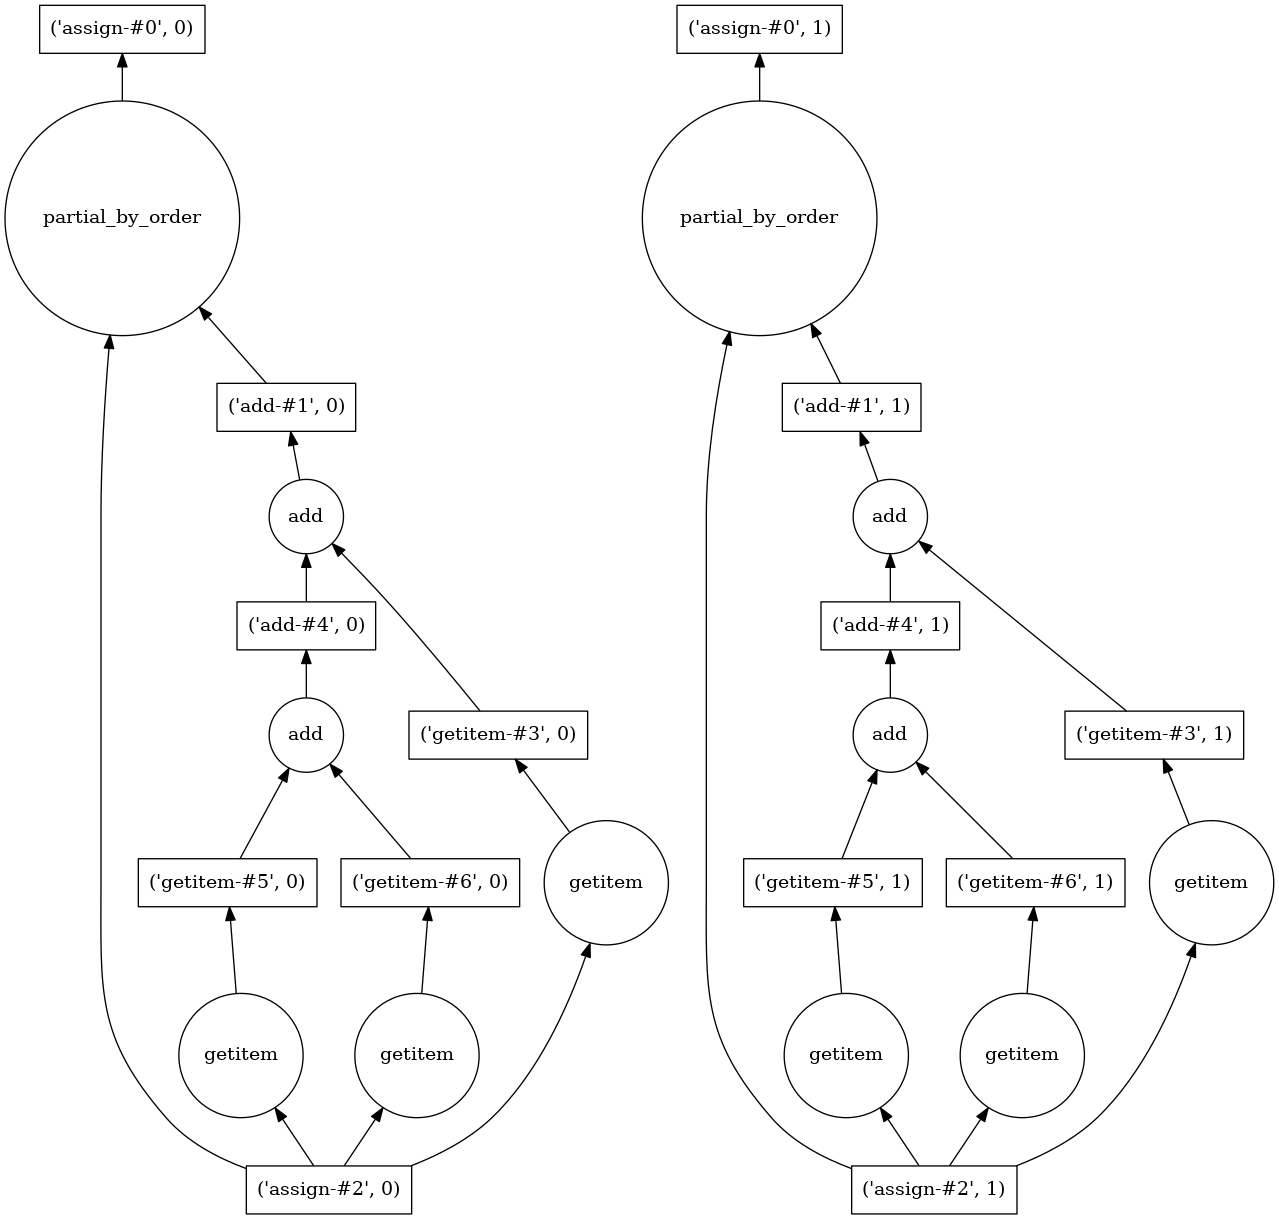

In [14]:
df.visualize('dask-post-persist-2', format='png')

## Dask graph when using `persist()`

In [15]:
df = dask.datasets.timeseries(partition_freq='15D')
df['z'] = df.x + df.y
df = df.persist()
df['tmp'] = df.x + df.y + df.z

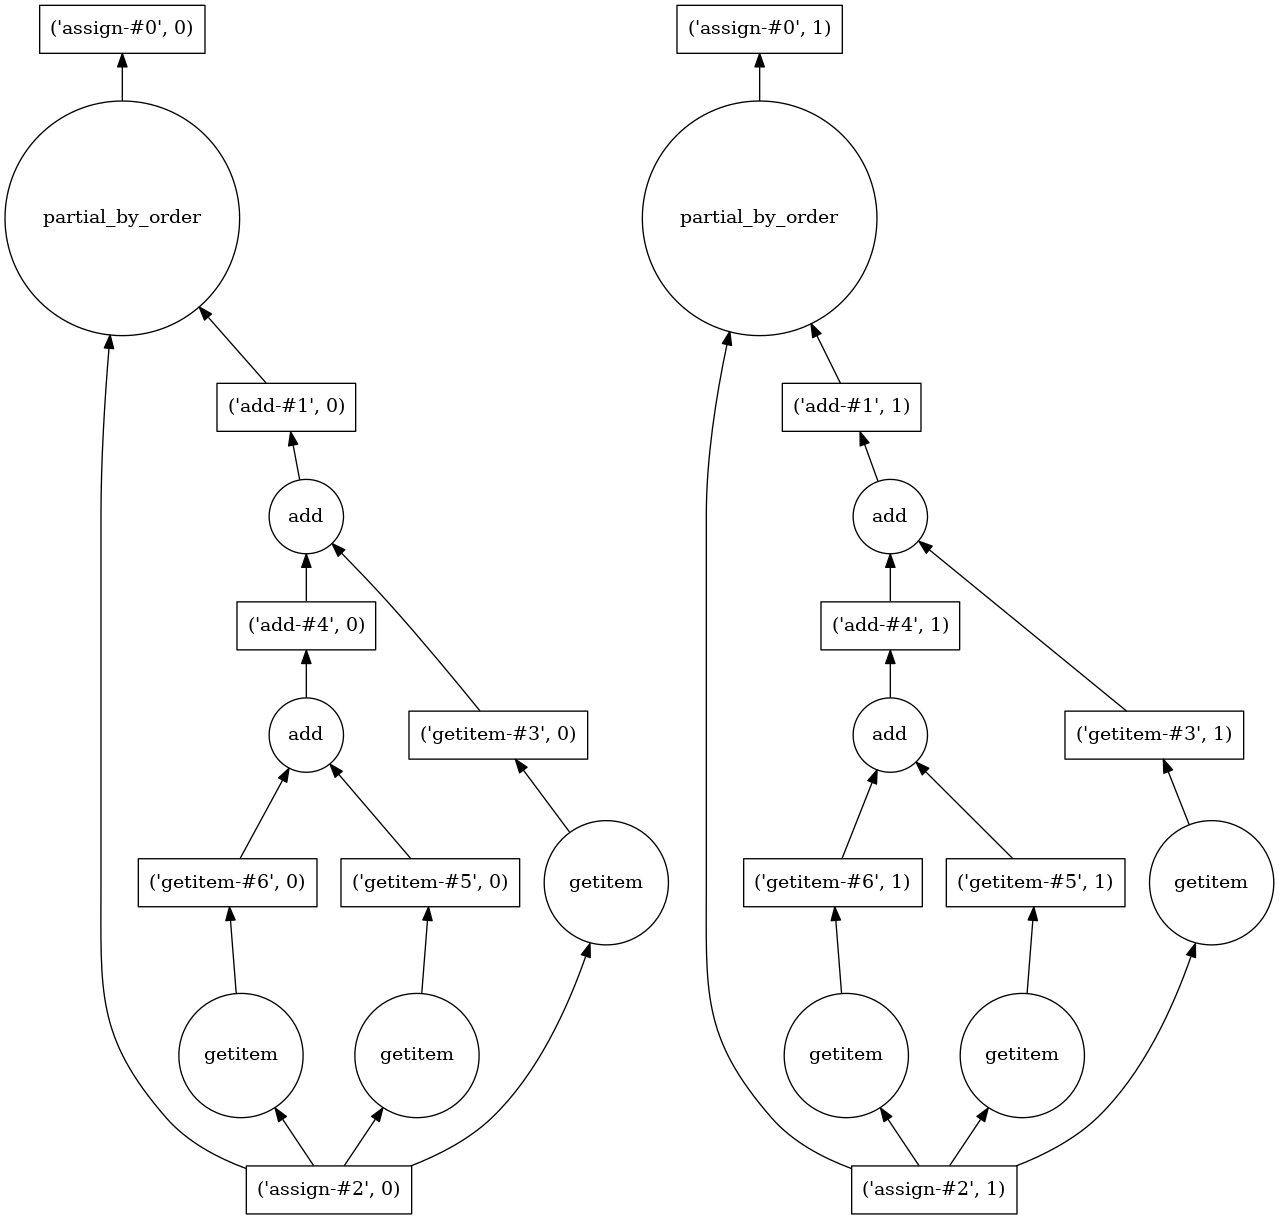

In [16]:
df.visualize()

## Dask graph without `persist()`

In [17]:
df = dask.datasets.timeseries(partition_freq='15D')
df['z'] = df.x + df.y
df['tmp'] = df.x + df.y + df.z

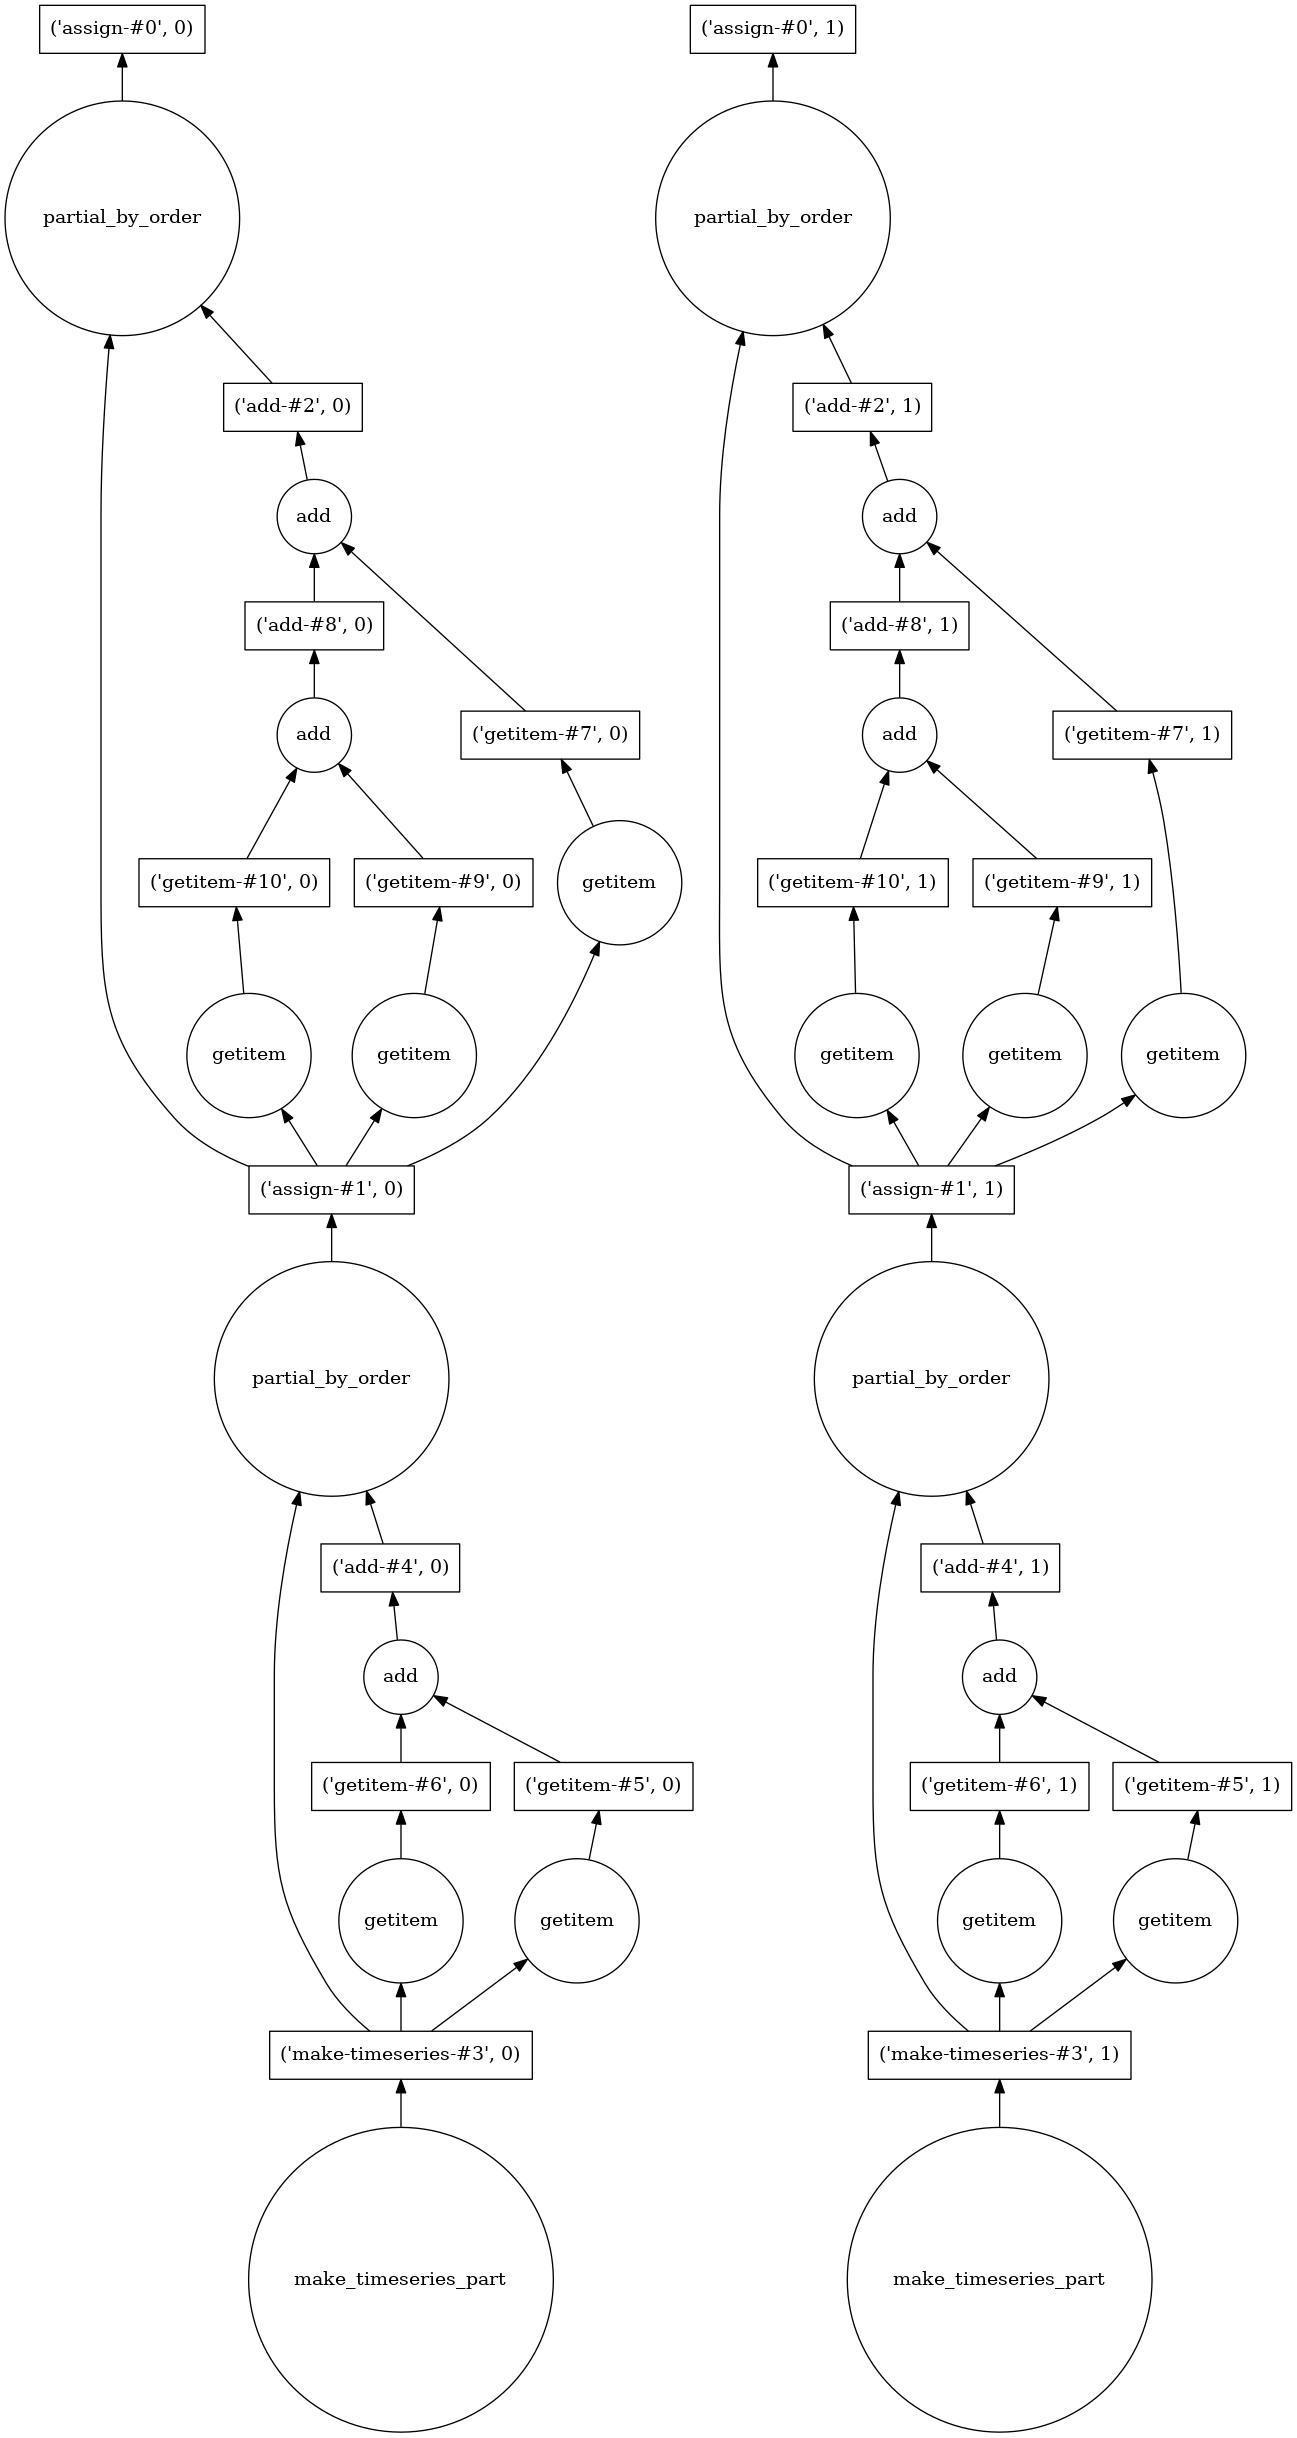

In [18]:
df.visualize()